In [40]:
#import the libraries 

import numpy as np
import pandas as pd

# Supressing scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# print plots
%matplotlib inline 

# Machine Learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor, plot_importance
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

In [41]:
#load data and read the file 
anime = pd.read_csv("/content/anime_log.csv")
df3=anime.copy()
# print(data.shape)
df3.drop(['description_no_puntuation', 'description_Clean'], axis=1, inplace=True)

#. Check description
# data.describe().T

df3.shape
df3.head()


,mediaType,eps,ongoing,sznOfRelease,description,contentWarn,rating,tag_'Comedy',tag_'Based on a Manga',tag_'Action',...,tag_'Vocaloid',tag_Others,studio_to_work,duration_log,watched_log,watching_log,wantWatch_log,dropped_log,votes_log,years_running_log
0,TV,64.00,False,Spring,The foundation of alchemy is based on the law ...,1,4.70,0,1,1,...,0,0,Others,1.79,11.55,9.57,10.16,7.88,11.37,0.69
1,Movie,1.00,False,Unknown,Mitsuha and Taki are two total strangers livin...,0,4.66,0,0,0,...,0,0,Others,4.68,10.98,7.28,9.99,4.83,10.69,0.00
2,Movie,1.00,False,Unknown,"After transferring into a new school, a deaf g...",1,4.66,0,1,0,...,0,0,Others,4.88,10.73,6.85,9.75,4.89,10.43,0.00
3,TV,10.00,False,Fall,"Picking up where the second season ended, the ...",0,4.66,0,1,0,...,0,0,Production I.G,2.56,10.13,7.69,9.00,5.12,9.77,0.00
4,TV,10.00,False,Spring,The battle to retake Wall Maria begins now! Wi...,1,4.65,0,1,1,...,0,0,Others,1.79,9.97,8.08,8.97,5.16,9.67,0.00


In [42]:
X = df3.drop(["rating", "description"],axis=1)#, 'Unnamed: 0',"Unnamed: 0.1" ], axis=1)
# X = df3.drop(["rating"], axis=1)
# X = df3.drop(["rating", "description"], axis=1)
y = df3["rating"]

In [43]:
X.dtypes

mediaType                        object
eps                             float64
ongoing                            bool
sznOfRelease                     object
contentWarn                       int64
tag_'Comedy'                      int64
tag_'Based on a Manga'            int64
tag_'Action'                      int64
tag_'Fantasy'                     int64
tag_'Sci Fi'                      int64
tag_'Shounen'                     int64
tag_'Family Friendly'             int64
tag_'Original Work'               int64
tag_'Non-Human Protagonists'      int64
tag_'Adventure'                   int64
tag_'Short Episodes'              int64
tag_'Drama'                       int64
tag_'Shorts'                      int64
tag_'Romance'                     int64
tag_'School Life'                 int64
tag_'Slice of Life'               int64
tag_'Animal Protagonists'         int64
tag_'Seinen'                      int64
tag_'Supernatural'                int64
tag_'Magic'                       int64


In [44]:
print(X.isnull().sum().sort_values(ascending = False), X.shape)

mediaType                       0
eps                             0
tag_'Magic'                     0
tag_'CG Animation'              0
tag_'Mecha'                     0
tag_'Ecchi'                     0
tag_'Based on a Light Novel'    0
tag_'Anthropomorphic'           0
tag_'Superpowers'               0
tag_'Promotional'               0
tag_'Sports'                    0
tag_'Historical'                0
tag_'Vocaloid'                  0
tag_Others                      0
studio_to_work                  0
duration_log                    0
watched_log                     0
watching_log                    0
wantWatch_log                   0
dropped_log                     0
votes_log                       0
tag_'Supernatural'              0
tag_'Seinen'                    0
tag_'Animal Protagonists'       0
tag_'Shounen'                   0
ongoing                         0
sznOfRelease                    0
contentWarn                     0
tag_'Comedy'                    0
tag_'Based on 

In [45]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,eps,ongoing,contentWarn,tag_'Comedy',tag_'Based on a Manga',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Family Friendly',...,sznOfRelease_Winter,studio_to_work_MADHOUSE,studio_to_work_OLM,studio_to_work_Others,studio_to_work_Production I.G,studio_to_work_Studio Deen,studio_to_work_Studio Pierrot,studio_to_work_Sunrise,studio_to_work_TMS Entertainment,studio_to_work_Toei Animation
0,64.00,False,1,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1.00,False,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.00,False,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,10.00,False,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,10.00,False,1,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


#Split data into train and test

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [47]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 5343
Number of rows in test data = 2290


In [48]:
# fitting a linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [49]:
#check the coefficients and intercept of the model, which are the parameters we learned

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
eps,-0.00
ongoing,-0.19
contentWarn,-0.12
tag_'Comedy',0.08
tag_'Based on a Manga',0.11
...,...
studio_to_work_Studio Pierrot,-0.04
studio_to_work_Sunrise,0.19
studio_to_work_TMS Entertainment,0.23
studio_to_work_Toei Animation,0.04


In [50]:
# function to compute adjusted R-squared from Marcelo
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [52]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
print(lin_reg_model_train_perf)

# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
print(lin_reg_model_test_perf)

Training Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.43 0.33       0.70            0.70 12.20
Test Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.43 0.33       0.68            0.68 12.11


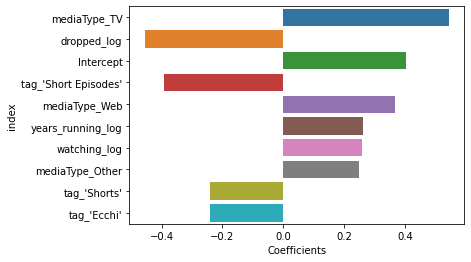

In [56]:
coef_copy=coef_df.copy()
coef_copy["Coefficients_abs"]=np.abs(coef_copy["Coefficients"])
coef_copy=coef_copy.sort_values("Coefficients_abs", ascending=False)
coef_copy.reset_index(inplace=True)
sns.barplot(data=coef_copy.head(10), x="Coefficients", y="index")

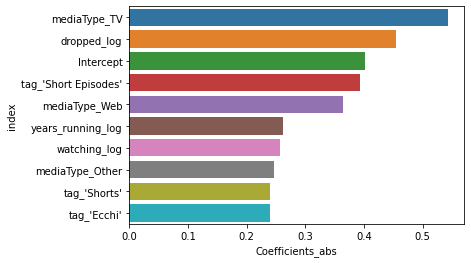

In [65]:
sns.barplot(data=coef_copy.head(10), x="Coefficients_abs", y="index")

#Lasso

In [73]:
model_lasso = Lasso(alpha=0.001).fit(x_train, y_train)

In [74]:
dict_lasso={ 
    "features":list(x_train),
    "coefficients":model_lasso.coef_,
    "coefficients_abs":np.abs(model_lasso.coef_)
}

coef_lasso = pd.DataFrame(dict_lasso)
coef_lasso

,features,coefficients,coefficients_abs
0,eps,-0.00,0.00
1,ongoing,-0.06,0.06
2,contentWarn,-0.11,0.11
3,tag_'Comedy',0.07,0.07
4,tag_'Based on a Manga',0.11,0.11
...,...,...,...
56,studio_to_work_Studio Deen,-0.00,0.00
57,studio_to_work_Studio Pierrot,-0.04,0.04
58,studio_to_work_Sunrise,0.13,0.13
59,studio_to_work_TMS Entertainment,0.15,0.15


In [75]:
coef_lasso.sort_values("coefficients_abs", ascending=False).head(16)

,features,coefficients,coefficients_abs
38,dropped_log,-0.45,0.45
45,mediaType_TV,0.40,0.40
13,tag_'Short Episodes',-0.37,0.37
36,watching_log,0.25,0.25
40,years_running_log,0.24,0.24
25,tag_'Ecchi',-0.23,0.23
37,wantWatch_log,0.23,0.23
15,tag_'Shorts',-0.22,0.22
43,mediaType_OVA,-0.20,0.20
47,mediaType_Web,0.20,0.20


In [80]:
# (coef_lasso["coefficients_abs"]==0).sum()
coef_lasso[(coef_lasso["coefficients_abs"]==0)]

,features,coefficients,coefficients_abs
6,tag_'Fantasy',-0.00,0.00
9,tag_'Family Friendly',-0.00,0.00
29,tag_'Promotional',-0.00,0.00
32,tag_'Vocaloid',0.00,0.00
41,mediaType_Movie,0.00,0.00
51,sznOfRelease_Winter,-0.00,0.00
55,studio_to_work_Production I.G,0.00,0.00
56,studio_to_work_Studio Deen,-0.00,0.00
60,studio_to_work_Toei Animation,-0.00,0.00


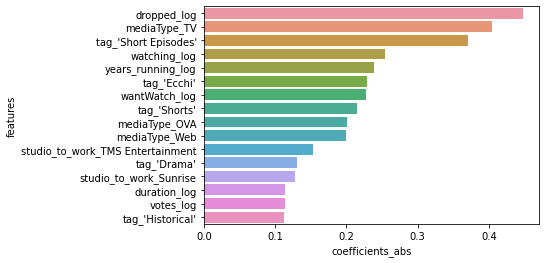

In [77]:
sns.barplot(data=coef_lasso.sort_values("coefficients_abs", ascending=False).head(16), x="coefficients_abs", y="features")

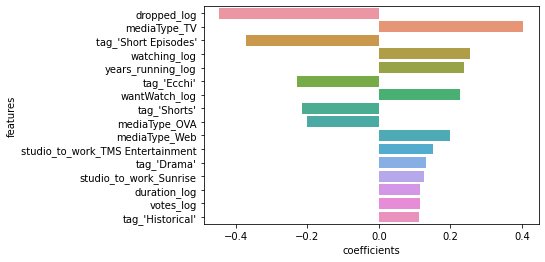

In [81]:
sns.barplot(data=coef_lasso.sort_values("coefficients_abs", ascending=False).head(16), x="coefficients", y="features")

In [78]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(model_lasso, x_train, y_train)
print(lin_reg_model_train_perf)





# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(model_lasso, x_test, y_test)
print(lin_reg_model_test_perf)

Training Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.43 0.33       0.70            0.69 12.30
Test Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.43 0.33       0.68            0.68 12.14


XGBRegressor & plot_importance

In [63]:
model_xgbregressor = XGBRegressor(
    max_depth=4, 
    learning_rate=0.1,
    n_estimators=100,
    random_seed=6, 
    reg_alpha=10
).fit(x_train, y_train)

# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(model_xgbregressor, x_train, y_train)
print(lin_reg_model_train_perf)

# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(model_xgbregressor, x_test, y_test)
print(lin_reg_model_test_perf)

[02:17:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.38 0.29       0.77            0.76 10.76
Test Performance

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.42 0.32       0.70            0.69 11.92


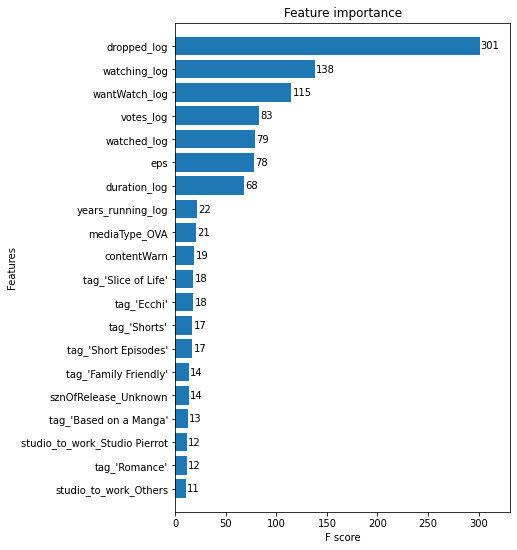

In [64]:
fig,ax=plt.subplots(1,1,figsize=(6,9))
plot_importance(model_xgbregressor,ax=ax, height=0.8, max_num_features=20)
plt.grid(False)